# 1) Dataset Preparation

This notebook begins the Week 1 task of verifying the structure and completeness of the dataset.  
We shall preview the data, inspect column integrity, and prepare it for anomaly detection.


### **Step 1 - Import Required Libraries**


We begin by importing the necessary libraries for data handling, visualisation, and modelling. These libraries provide the core tools required for preparing the data, creating plots, scaling values:

- pandas - used for loading, organising, and manipulating the dataset in tabular form.

- numpy - provides support for efficient numerical operations and array handling.

- matplotlib.pyplot - enables creation of static plots for visualising time series data and results.

- seaborn - enhances visualisation with more attractive and informative statistical plots.

- MinMaxScaler (from sklearn.preprocessing) - scales features to a defined range (0 to 1 in our case), essential for distance-based models.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

---


### **Step 2 - Define File Path**

We define the relative path to the dataset. This assumes that `InternalBleeding14.csv` is stored in the `data/` subfolder.


In [ ]:
file_path = 'data/InternalBleeding14.csv'

---


### **Step 3 - Load Dataset**

We load the dataset into a pandas DataFrame for further exploration and processing.


In [ ]:
df = pd.read_csv(file_path, sep="\t")

---


### **Step 4 - Preview the Dataset**
We print the first 10 rows to check that the data has loaded correctly and to confirm that the `timestamp` and `value` columns are present and well-formed.



In [ ]:
print("\nFirst 10 rows of dataset:")
display(df.head(10))


First 10 rows of dataset:


,timestamp,value
0,0,97.46170
1,1,97.38159
2,2,97.18323
3,3,96.96197
4,4,96.67206
5,5,96.55380
6,6,96.62247
7,7,96.48132
8,8,96.52329
9,9,96.79413


#### **Observations from the Preview**

The `timestamp` column begins at 0 and increments sequentially, suggesting a regular time index.  
The `value` column contains floating-point sensor readings with no obvious irregularities or missing values.  
These entries suggest that the dataset is correctly structured and ready for further inspection.


---


## **Initial Data Inspection**

### **Step 5 - Dataset Information**

We first inspect the dataset’s structure using `.info()`.  
This confirms the column types, memory usage, and whether any fields are missing or malformed.


In [ ]:
print("\nDataset information:")
df.info()


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  7501 non-null   int64  
 1   value      7501 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 117.3 KB



#### **Interpreting the Dataset Structure**
The dataset contains **7501 rows** and **2 columns**:  
- `timestamp`: integer type, acting as sequential time index.
- `value`: float type, representing the observed signal measurement.

All entries are non-null, indicating **no missing data** in either column.

---

### **Step 6 - Check for Missing Values**

We verify that there are no missing values in either column.  
This ensures data completeness and avoids preprocessing issues later.


In [ ]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
timestamp    0
value        0
dtype: int64


#### **Interpreting Missing Value Report**
Both columns show zero missing values, confirming dataset completeness prior to analysis.


---


### **Step 7 -  Descriptive Statistics**

Basic statistics such as mean, standard deviation, min, and max  
help us understand the overall distribution and variability of the signal.


In [ ]:
print("\nBasic descriptive statistics:")
display(df.describe())


Basic descriptive statistics:


,timestamp,value
count,7501.000000,7501.000000
mean,3750.000000,84.835175
std,2165.496517,10.459530
min,0.000000,66.604610
25%,1875.000000,75.939180
50%,3750.000000,83.328250
75%,5625.000000,93.044280
max,7500.000000,108.680700


#### **Summary of Statistical Characteristics**
- **Count**: Confirms full data length (7501 entries)  
- **Mean**: ~84.83 indicates the central tendency  
- **Std**: ~10.46 shows moderate variability  
- **Min/Max**: Range between 66.60 and 108.68 suggests possible outlier zones  
- **Quartiles**: Reveal spread and central concentration  

*Educational Note:* These stats help characterise what ‘normal’ looks like in the signal. Useful later for anomaly thresholds.


---

### **Step 8 - Full Time Series Plot**

This plot allows visual inspection of the signal’s behaviour.  
We observe a clear periodic structure with variations in amplitude, which may contain anomalies.


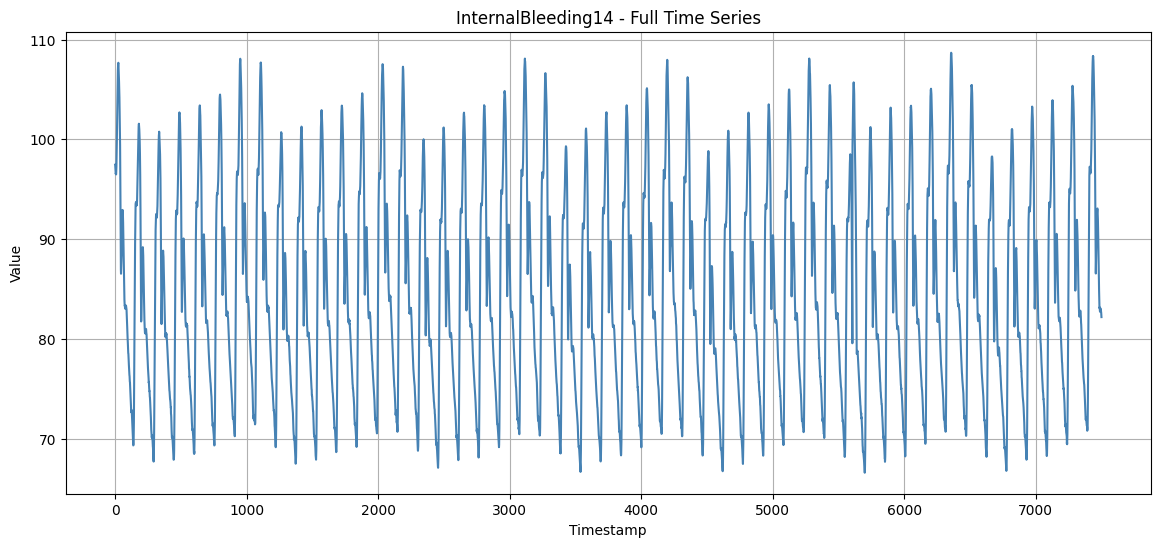

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(df['timestamp'], df['value'], color='steelblue')
plt.title('InternalBleeding14 - Full Time Series')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.grid()
plt.show()


#### **Observations and Interpretation**


The time series shows a consistent cyclic structure, typical of physiological sensor signals.  

**Key observations:**
- Stable periodicity across duration  
- Amplitude ranges from ~66 to ~108  
- Sharp peaks and troughs may indicate anomalous events  

**Interpretation:**

The signal displays a regular periodic structure with clear oscillations and stable frequency. Amplitude varies between approximately 66 and 108 units, with occasional sharp deviations that may correspond to anomalous events.

*Educational Note:*
This visual step grounds the modeller in the signal’s dynamics before applying any detection algorithms.




---



### **Educational Note:**
These descriptive stats are crucial for understanding normal behaviour and early suspicion of potential anomalies. The full amplitude range suggests physiological fluctuation typical for this benchmark dataset.
